## Import modules

In [1]:
import sys
sys.path.append('/home/malthera/Documents/IDDEFIX')

import numpy as np
import matplotlib.pyplot as plt
import iddefix

# Simulation data example

This example features CST simulated wakefield data of the "Accelerator Cavity" introductory example.

## Fitting on fully decayed wakefield

### Import data

In [6]:
# Importing impedance data
data = np.loadtxt('data/003_beam_wire_scanner.txt', comments='#', delimiter='\t')

# Extracting frequency and impedance

frequency = data_fully_decayed[:,0]*1e9 # Convert to GHz
real_impedance = data_fully_decayed[:,1]
imag_impedance = data_fully_decayed[:,2]

impedance = real_impedance + 1j*imag_impedance


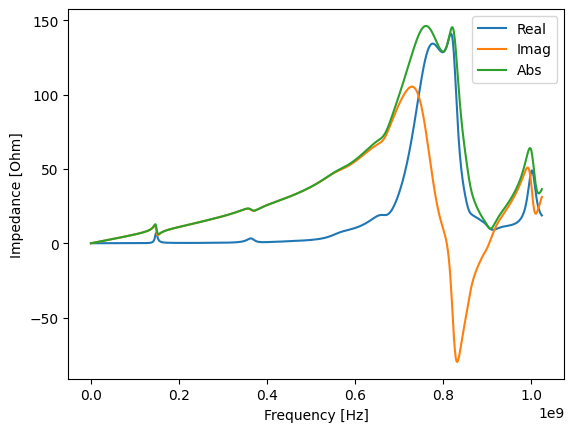

In [7]:
plt.plot(frequency, impedance_fd.real, label='Real')
plt.plot(frequency, impedance_fd.imag, label='Imag')
plt.plot(frequency, np.abs(impedance_fd), label='Abs')

plt.xlabel('Frequency [Hz]')
plt.ylabel('Impedance [Ohm]')
plt.legend()

For the beam wire scanner, the power loss due to the real part of the impedance is crucial. Thus this example will demonstrate fitting upon the real part, as opposed to the prior examples which fitted upon the absolute impedance magnitude

In [8]:
# Setting amount of resonators to fit

Nres = 6

# Bounds on resonators parameters
""" In this example, we will use the SmartBoundDetermination class to determine the bounds on the resonators parameters. 
By using SmartBoundDetermination ther is no need to specify the bounds manually."""

SBD_parameterBound = iddefix.SmartBoundDetermination(frequency, impedance, minimum_peak_height=2)

/home/malthera/miniconda3/envs/garfield-env/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/malthera/miniconda3/envs/garfield-env/lib/python3.9/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/malthera/miniconda3/envs/garfield-env/lib/python3.9/site-packages/numpy/ma/core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/home/malthera/miniconda3/envs/garfield-env/lib/python3.9/site-packages/matplotlib/text.py:757: ComplexWarning: Casting complex values to real discards the imaginary part
  posy = float(self.convert_yunits(self._y))
/home/malthera/miniconda3/envs/garfield-env/lib/python3.9/site-packages/matplotlib/text.py:898: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.c

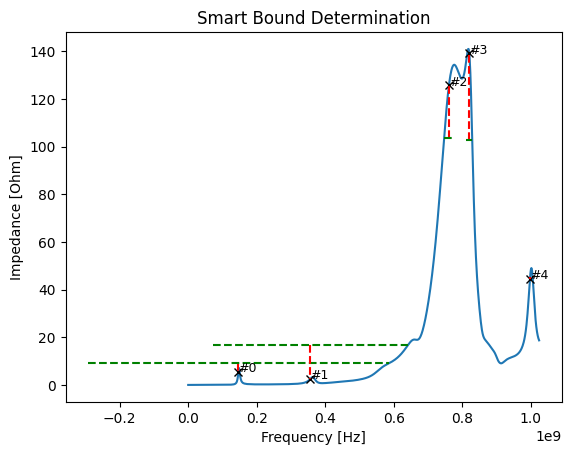

In [11]:
SBD_parameterBound.inspect()

#### Running IDDEFIX DE
Running the DE algorithm with IDDEFIX and chosen parameters.

In [9]:
%%time
DE_model_fd = iddefix.EvolutionaryAlgorithm(frequency, 
                                         impedance,
                                         N_resonators=Nres, 
                                         parameterBounds=SBD_parameterBound.find(),
                                         plane="longitudinal", 
                                         objectiveFunction=iddefix.ObjectiveFunctions.sumOfSquaredErrorReal)

DE_model_fd.run_differential_evolution(maxiter=30000,
                                    popsize=30,
                                    tol=0.01,
                                    mutation=(0.4, 1.0),
                                    crossover_rate=0.7)
print(DE_model_fd.warning)


/home/malthera/Documents/IDDEFIX/iddefix/smartBoundDetermination.py:78: RuntimeWarning: divide by zero encountered in scalar divide
  initial_Qs[i] = frequency_data[peak]/(upper_lower_bound*2)


ValueError: bounds should be a sequence containing finite real valued (min, max) pairs for each value in x

#### Minimization step
To further refine the solution obtained by the DE algorithm, a second optimization step is applied using the Nelder-Mead minimization algorithm.

In [ ]:
DE_model_fd.run_minimization_algorithm()

Method for minimization : Nelder-Mead


----------------------------------------------------------------------
Resonator |   Rs [Ohm/m or Ohm]    |        Q         |    fres [Hz]     
----------------------------------------------------------------------
    1     |        3.03e+03        |      69.88       |    5.453e+08     
    2     |        2.36e+03        |      64.55       |    8.123e+08     
----------------------------------------------------------------------
